# Feature Selection

* 1. Supervised
    * a. Filter
    * b. Wrapper
    * c. Intrinsic
* 2. Unsupervised

Dimensionality reduction is also related to feature selection, whereby you project input data into a loweer dimensional feature space.

In [11]:
import pandas as pd
import seaborn as sns

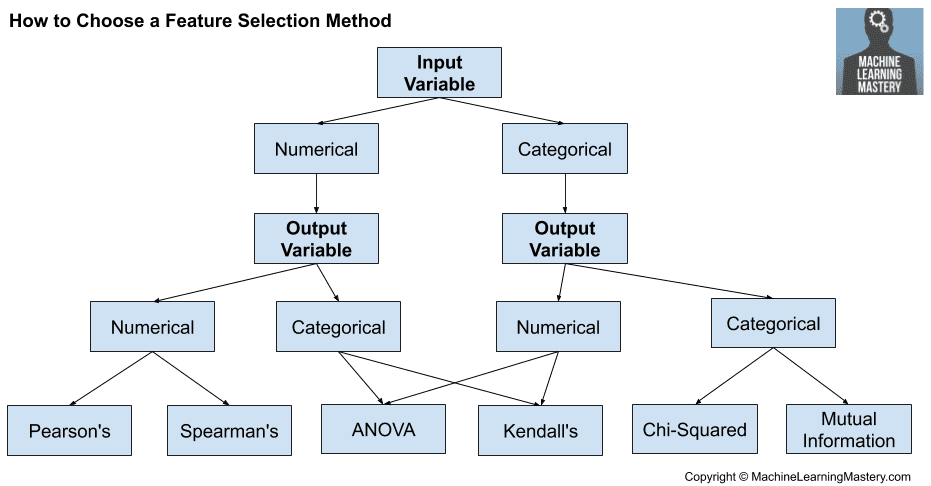

## Regression Feature Selection

In [1]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest, f_regression

X, y = make_regression(n_samples=100, n_features=100, n_informative=10)

In [2]:
fs = SelectKBest(score_func=f_regression, k=10)
fs

SelectKBest(score_func=<function f_regression at 0x7f1c43b32b60>)

In [3]:
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(100, 10)


In [4]:
X_selected

array([[-3.17272123e-01,  8.55010736e-01, -1.36146483e-01,
         1.15228818e+00, -1.01653353e+00,  5.47542744e-01,
        -1.92424385e-01,  6.50127956e-01,  3.06539837e-01,
         5.99009561e-01],
       [-1.81290485e+00,  3.16102149e-01,  2.15573442e+00,
         1.66457453e+00,  4.89465995e-01, -2.64282400e-01,
        -6.72322492e-01, -2.26141606e-01,  3.88278152e-01,
         9.35789301e-02],
       [ 7.92630995e-01, -1.20829026e+00,  8.89313300e-01,
        -8.65208069e-01,  1.44562996e+00, -1.27654368e-01,
         4.00849541e-01,  2.14141902e-01,  5.12267152e-01,
        -6.01238438e-01],
       [ 1.87866273e-01,  9.75991016e-01, -3.67190394e-01,
         1.20882501e+00,  1.71700329e+00, -6.89676959e-01,
         4.79921532e-02,  2.90021370e-01,  7.78424544e-02,
        -1.64462449e+00],
       [-4.51489619e-01,  3.54293683e-01,  9.01606824e-01,
        -9.96741852e-01,  1.15557806e+00,  3.30363991e-01,
         7.95452450e-01, -1.36474485e+00, -8.49223529e-01,
        -1.

## Classification Feature Selection

In [6]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif

X, y = make_classification(n_samples=100, n_features=20, n_informative=2)

In [7]:
fs = SelectKBest(score_func=f_classif, k=2)

In [9]:
X_selected = fs.fit_transform(X, y)

In [10]:
print(f"shape: {X_selected.shape}")

shape: (100, 2)


# Common Feature Selection Methods

In [79]:
mpg = sns.load_dataset('mpg').select_dtypes('number').dropna()
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


## 1. Variance Threshold Feature Selection

Used to elimiated constant observations.
Used for unsupervised learning.

In [80]:
from sklearn.feature_selection import VarianceThreshold

threshold = 0
selector = VarianceThreshold(threshold)

In [81]:
new_dataset = pd.DataFrame(scaler.fit_transform([[1, 2, 1], [3, 5, 1], [5, 2, 1], [4, 5, 1]]), columns=['not_constant', 'not_constant_2', 'constant'])
new_dataset

,not_constant,not_constant_2,constant
0,-1.521278,-1.0,0.0
1,-0.169031,1.0,0.0
2,1.183216,-1.0,0.0
3,0.507093,1.0,0.0


In [82]:
selector.fit(new_dataset)
new_dataset.columns[selector.get_support()]

Index(['not_constant', 'not_constant_2'], dtype='object')

## 2. Univariate Feature Selection with SelectKBest

In [83]:
X = mpg.drop('mpg', axis=1)
Y = mpg['mpg']

In [84]:
X.shape, Y.shape

((392, 6), (392,))

In [86]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=2)
selector.fit(X, Y)

SelectKBest(k=2, score_func=<function mutual_info_regression at 0x7f1c43b30b80>)

In [87]:
X.columns[selector.get_support()]

Index(['displacement', 'weight'], dtype='object')

## Recursive Feature Elimination

Utilizes a machine learning model to select feature by eliminating after recursively training.

In [88]:
titanic_dataset = sns.load_dataset('titanic')[['survived', 'pclass', 'age', 'parch', 'sibsp', 'fare']].dropna()

In [90]:
X = titanic_dataset.drop('survived', axis=1)
Y = titanic_dataset['survived']

In [91]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=2, step=1)
rfe_selector.fit(X, Y)

RFE(estimator=LogisticRegression(), n_features_to_select=2)

In [93]:
X.columns[rfe_selector.get_support()]

Index(['pclass', 'parch'], dtype='object')

## Feature Selection via Select From Model



In [95]:
from sklearn.feature_selection import SelectFromModel

sfm_selector = SelectFromModel(estimator=LogisticRegression())
sfm_selector.fit(X, Y)

SelectFromModel(estimator=LogisticRegression())

In [96]:
X.columns[sfm_selector.get_support()]

Index(['pclass'], dtype='object')

## Feature Selection Sequential Feature Selection (SFS)

SFS is a greedy algorithm which finds the best features by going back or forth based on the cross-validation score.

In [97]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs_selector = SequentialFeatureSelector(estimator=LogisticRegression(), n_features_to_select=3, cv=10, direction='backward')
sfs_selector.fit(X, Y)

SequentialFeatureSelector(cv=10, direction='backward',
                          estimator=LogisticRegression(),
                          n_features_to_select=3)

In [98]:
X.columns[sfs_selector.get_support()]

Index(['pclass', 'age', 'parch'], dtype='object')